<a href="https://colab.research.google.com/github/harshanainar/Semantic-Segmentation-for-Autonomous-Vehicles-Using-U_Net/blob/main/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io as io
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_height = 352
img_width = 480

In [5]:
list_train_file = glob('/content/drive/MyDrive/CamVid/train/*.png')

# Preload images and segmentation masks
train_images = []
train_masks = []
for i in range(len(list_train_file)):
    img_filename = list_train_file[i]
    seg_filename = list_train_file[i].replace('/train/','/train_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)
    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)

    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))
    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    train_images.append(img)
    train_masks.append(seg)

train_images = np.stack(train_images)
train_masks = np.stack(train_masks)

def load_train_img(index):
    img_tr = train_images[index]
    seg_tr = train_masks[index]
    return img_tr, seg_tr
%whos

Variable             Type        Data/Info
------------------------------------------
ImageDataGenerator   type        <class 'keras.src.preproc<...>mage.ImageDataGenerator'>
cv2                  module      <module 'cv2' from '/usr/<...>ackages/cv2/__init__.py'>
drive                module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
glob                 function    <function glob at 0x7e54f6848820>
i                    int         368
img                  ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_filename         str         /content/drive/MyDrive/Ca<...>/train/Seq05VD_f05100.png
img_height           int         352
img_width            int         480
io                   module      <module 'skimage.io' from<...>/skimage/io/__init__.py'>
keras                module      <module 'keras.api._v2.ke<...>i/_v2/keras/__init__.py'>
list_train_file      list        n=369
load_train_img       function    <function load_train_img a

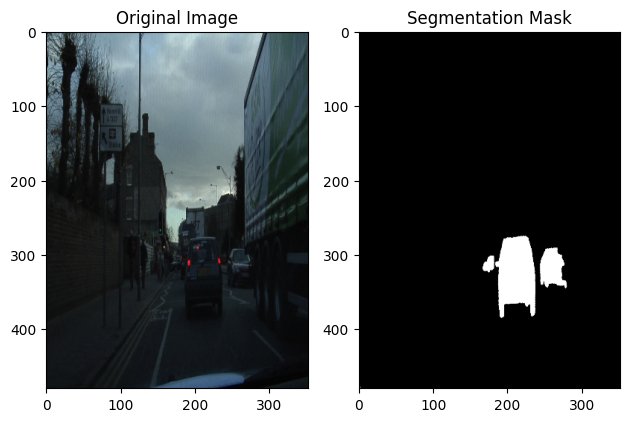

In [6]:
# Select the index of the image you want to visualize
index = 1

# Load the image and segmentation mask
img_tr, seg_tr = load_train_img(index)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_tr)
seg_arr = np.squeeze(seg_tr)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Original Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [7]:

list_val_file = glob('/content/drive/MyDrive/CamVid/val/*.png')


# Preload images and segmentation masks
val_images = []
val_masks = []
for i in range(len(list_val_file)):
    img_filename = list_val_file[i]
    seg_filename = list_val_file[i].replace('/val/','/val_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)


    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)
    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))

    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    val_images.append(img)
    val_masks.append(seg)



val_images = np.stack(val_images)
val_masks = np.stack(val_masks)



def load_val_img(index):
    img_v = val_images[index]
    seg_v = val_masks[index]
    return img_v, seg_v

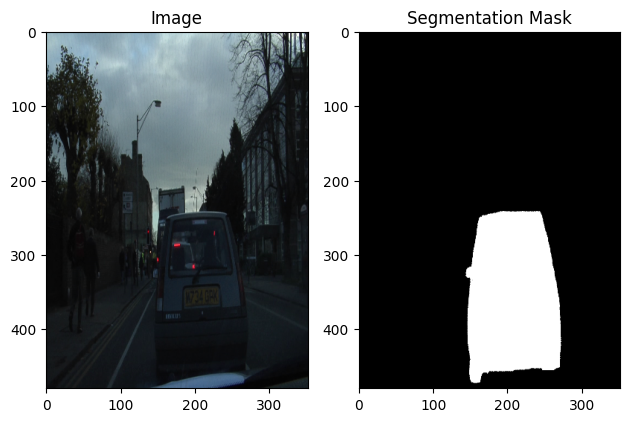

In [8]:
# Load the image and segmentation mask
img_v,seg_v = load_val_img(0)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_v)
seg_arr = np.squeeze(seg_v)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [9]:
list_test_file = glob('/content/drive/MyDrive/CamVid/test/*.png')



# Preload images and segmentation masks
test_images = []
test_masks = []
for i in range(len(list_test_file)):
    img_filename = list_test_file[i]
    seg_filename = list_test_file[i].replace('/test/','/test_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)



    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)
    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))

    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    test_images.append(img)
    test_masks.append(seg)



test_images = np.stack(test_images)
test_masks = np.stack(test_masks)



def load_test_img(index):
    img_t = test_images[index]
    seg_t = test_masks[index]
    return img_t, seg_t


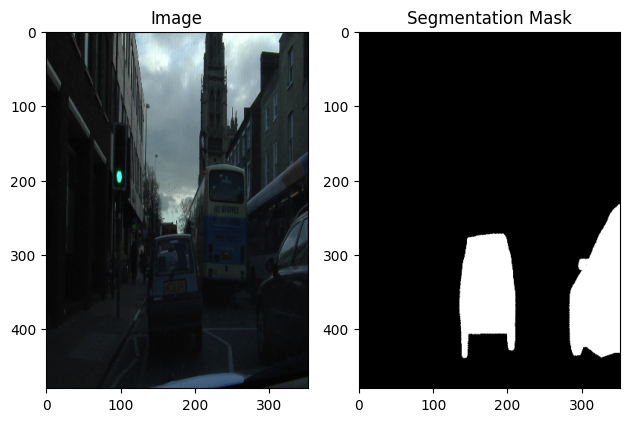

In [10]:
# Load the image and segmentation mask
img_t,seg_t = load_test_img(0)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_t)
seg_arr = np.squeeze(seg_t)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [11]:
%whos

Variable             Type        Data/Info
------------------------------------------
ImageDataGenerator   type        <class 'keras.src.preproc<...>mage.ImageDataGenerator'>
cv2                  module      <module 'cv2' from '/usr/<...>ackages/cv2/__init__.py'>
drive                module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
glob                 function    <function glob at 0x7e54f6848820>
i                    int         231
img                  ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_arr              ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_filename         str         /content/drive/MyDrive/Ca<...>d/test/Seq05VD_f05040.png
img_height           int         352
img_t                ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_tr               ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
i

In [12]:
from unet import UNet
model = UNet(input_shape=(None,None,3),num_output =1)

In [13]:
from unet import iou_metric
from tensorflow import keras
model.compile(loss = keras.losses.binary_crossentropy,
   optimizer = keras.optimizers.Nadam(learning_rate=0.0001),
    metrics=[iou_metric,])

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


mc = ModelCheckpoint(mode='max', filepath='/content/drive/MyDrive/Camvid-Weights1.hdf5', monitor='val_iou_mertic',save_best_only='True', verbose=1)
es = EarlyStopping(monitor='val_iou_metric', patience=10, verbose=0)

In [15]:
from re  import VERBOSE
model.fit(train_images,train_masks,batch_size=4,epochs=30,
          validation_data=(val_images,val_masks),callbacks=[mc,es],verbose=1)

Epoch 1/30
93/93 [==============================] - ETA: 0s - loss: 0.1411 - iou_metric: 1.0705e-04

93/93 [==============================] - 147s 1s/step - loss: 0.1411 - iou_metric: 1.0705e-04 - val_loss: 0.1660 - val_iou_metric: 0.0000e+00
Epoch 2/30
93/93 [==============================] - ETA: 0s - loss: 0.1348 - iou_metric: 0.0096

93/93 [==============================] - 88s 942ms/step - loss: 0.1348 - iou_metric: 0.0096 - val_loss: 0.1802 - val_iou_metric: 0.0000e+00
Epoch 3/30
93/93 [==============================] - ETA: 0s - loss: 0.1036 - iou_metric: 0.0100

93/93 [==============================] - 87s 941ms/step - loss: 0.1036 - iou_metric: 0.0100 - val_loss: 0.0949 - val_iou_metric: 0.0012
Epoch 4/30
93/93 [==============================] - ETA: 0s - loss: 0.0786 - iou_metric: 0.1015

93/93 [==============================] - 87s 938ms/step - loss: 0.0786 - iou_metric: 0.1015 - val_loss: 0.0795 - val_iou_metric: 0.0839
Epoch 5/30
93/93 [==============================] - ETA: 0s - loss: 0.0623 - iou_metric: 0.2172

93/93 [==============================] - 87s 937ms/step - loss: 0.0623 - iou_metric: 0.2172 - val_loss: 0.0604 - val_iou_metric: 0.3162
Epoch 6/30
93/93 [==============================] - ETA: 0s - loss: 0.0482 - iou_metric: 0.3380

93/93 [==============================] - 87s 939ms/step - loss: 0.0482 - iou_metric: 0.3380 - val_loss: 0.0506 - val_iou_metric: 0.3943
Epoch 7/30
93/93 [==============================] - ETA: 0s - loss: 0.0438 - iou_metric: 0.3665

93/93 [==============================] - 91s 982ms/step - loss: 0.0438 - iou_metric: 0.3665 - val_loss: 0.0511 - val_iou_metric: 0.4476
Epoch 8/30
93/93 [==============================] - ETA: 0s - loss: 0.0378 - iou_metric: 0.4393

93/93 [==============================] - 91s 981ms/step - loss: 0.0378 - iou_metric: 0.4393 - val_loss: 0.1614 - val_iou_metric: 0.0491
Epoch 9/30
93/93 [==============================] - ETA: 0s - loss: 0.0553 - iou_metric: 0.3235

93/93 [==============================] - 87s 937ms/step - loss: 0.0553 - iou_metric: 0.3235 - val_loss: 0.0522 - val_iou_metric: 0.3981
Epoch 10/30
93/93 [==============================] - ETA: 0s - loss: 0.0369 - iou_metric: 0.4719

93/93 [==============================] - 91s 980ms/step - loss: 0.0369 - iou_metric: 0.4719 - val_loss: 0.0427 - val_iou_metric: 0.5090
Epoch 11/30
93/93 [==============================] - ETA: 0s - loss: 0.0354 - iou_metric: 0.4860

93/93 [==============================] - 87s 937ms/step - loss: 0.0354 - iou_metric: 0.4860 - val_loss: 0.0387 - val_iou_metric: 0.5432


In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, None, None, 64)       1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_24 (Conv2D)          (None, None, None, 64)       36928     ['conv2d_23[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, None, None, 64)       0         ['conv2d_24[0][0]']           
 g2D)                                                                                       

In [17]:
# Save the weights to a file
model.save_weights('model_weights.h5')

In [18]:
# Load the saved weights into the model
model.load_weights('model_weights.h5')

1/1 [==============================] - 0s 256ms/step


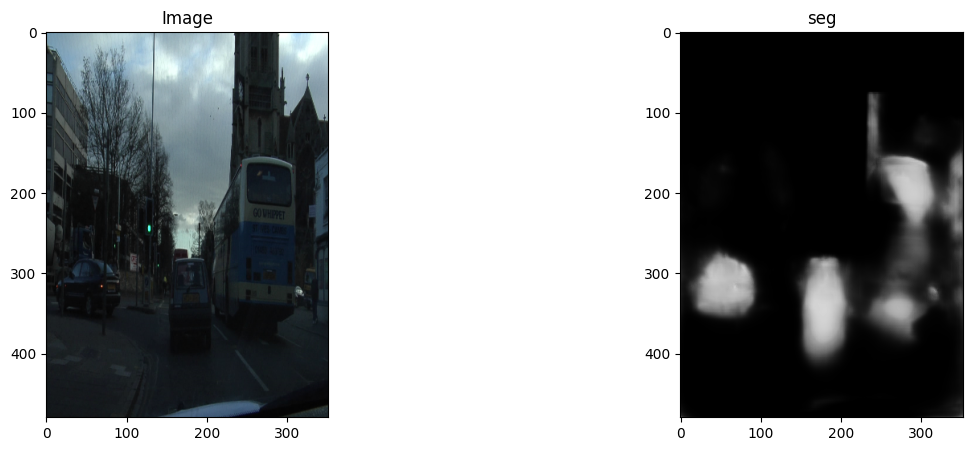

In [19]:
# Load the downloaded image
image_path = '/content/drive/MyDrive/CamVid/test/0001TP_006930.png'
img = np.float32(io.imread(image_path)) / 255

# Resize the image to match the model input size
img = cv2.resize(img, (img_height, img_width))

# Reshape the image to match the model input shape
x = np.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))

# Perform prediction
pred = model.predict(x)
pred = pred[0, :, :, 0]

# Visualize the image and the network output
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(pred, clim=[0, 1], cmap='gray')
plt.title('seg')
plt.show()